# Лабораторная работа 5

# Анимация качения треугольника Рело в квадрате. Векторизация вычислений в numpy 

Ковалевская В.С., 24. 03. 2022

## Определения и свойства

Треугольник Рело представляет собой область пересечения трех кругов радиуса $r$ с центрами в вершинах равностороннего треугольника с длиной стороны $r$.

Так как треугольник Рело является фигурой постоянной ширины, то его можно вписать в квадрат с длиной стороны, равной $r$ таким образом, что треугольник Рело будет касаться всех сторон квадрата. Это связано с тем, что противоположные стороны квадрата, расстояние между которыми равно $r$, располагаются на опорных прямых к треугольнику Рело.

**Качение треугольника Рело** -- это вращение треугольника Рело в квадрате относительно центра треугольника с дополнительным смещением центра треугольника Рело, чтобы обеспечить касание всех сторон квадрата при движении треугольника Рело. Качение треугольника Рело происходит за счет его одновременного поступательного и вращательного движения. Поступательное движение осуществляется по траектории, близкой к окружности.

## Задание 5.1

$\color{red}{Создайте}$ анимацию качения треугольника Рело с шириной $r$ в квадрате с длиной стороны, равной $r$, против часовой стрелки.

Центр квадрата с длиной стороны $r$ располагаем в начале координат.

Качение треугольника Рело происходит за счет его одновременного поступательного и вращательного движения:

- Полагаем, что при качении в квадрате центр треугольника Рело совершает поступательное движение по окружности с центром в начале координат и заданным радиусом, который необходимо найти. Движение центра треугольника Рело по окружности осуществляется против часовой стрелки.

- Треугольник Рело совершает также вращательное движение ПО часовой стрелке. Поступательное и вращательные движения согласованы таким образом, что полный оборот центра треугольника Рело на угол $2\pi$ соответствует вращению треугольника Рело на угол $2\pi/3.$

# Реализация Задания 5.1

In [1]:
import math #импортируем нужные модули
import numpy as np
import matplotlib.pyplot as plt
import relo

import matplotlib.animation as anim

In [2]:
%matplotlib widget

## Этап 1. Изображение начального положения треугольника Рело и квадрата в одной графической области

Определим исходные данные для построения треугольника Рело. Используем функцию regular_polygon_Relo(n, center, r, N) из модуля relo, созданного в Лабораторной работе 4

In [3]:
n = 3 # количество вершин треугольника Рело
center = np.array([0.,0.]) # центр треугольника Рело
r = 10 # ширина треугольника Рело
N = 100 # количество точек для описания стороны треугольника Рело

relo_matrix = relo.regular_polygon_Relo(r=r, center=center, N=N) #матрица, каждая строка которой содержит координаты точек, описывающих границу правильного многоугольника Рело

$\color{red}{Постройте}$ матрицу square для покоординатного описания границы квадрата с длиной стороны $r$ и центром в начале координат

$\color{red}{Изобразите}$ в одной системе координат квадрат, треугольник Рело и точку центра треугольника Рело

In [4]:
s1 = [[center[0] - r/2, center[1] - r/2],[center[0] + r/2, center[1] - r/2],[center[0] + r/2,center[0] + r/2],[center[0] - r/2, center[1] + r/2],[center[0] - r/2, center[1] - r/2]]
s1 # координаты точек квадрата

[[-5.0, -5.0], [5.0, -5.0], [5.0, 5.0], [-5.0, 5.0], [-5.0, -5.0]]

In [5]:
square = np.array(s1) #матрица для покоординатного описания границы квадрата

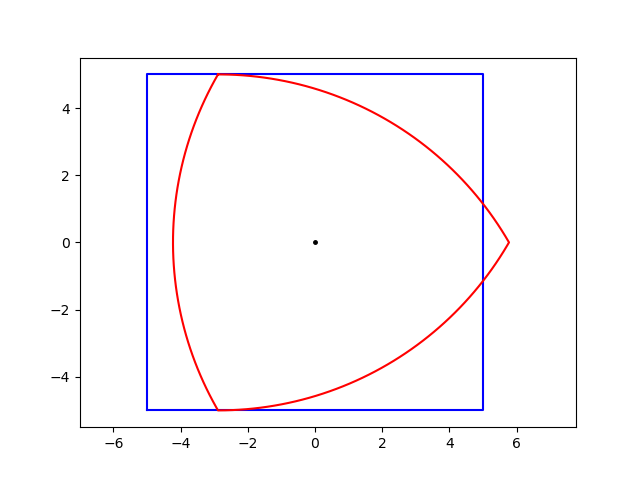

In [6]:
plt.plot(square[:,0],square[:,1],'b-') #квадрат
plt.plot(relo_matrix[:,0],relo_matrix[:,1],'r-') #треугольник Рело
plt.plot(center[0],center[1],'k.',markersize=5) #центр 

plt.axis('equal')
plt.show()

In [7]:
max_x_relo = relo_matrix[0][0]
max_x_relo

-2.88675134594813

In [8]:
max_x_relo = relo_matrix[0][0]
for i in range(len(relo_matrix)): #находим максимальную х - ую координату
    if relo_matrix[i][0] > max_x_relo:
        max_x_relo = relo_matrix[i][0]
    
max_x_relo #х - вая координата крайней правой вершины треугольника Рело

5.77350269189626

In [9]:
max_x_sq = max(square[:,0])
max_x_sq # х - вая координата крайней правой стороны квадрата

5.0

In [10]:
shift_x = max_x_relo - max_x_sq
shift = np.array([shift_x, 0.]) # добавляем 0, т.к. по игрикам треугольник не сдвигаем

(-5.5, 5.5, -5.5, 5.500000000000001)

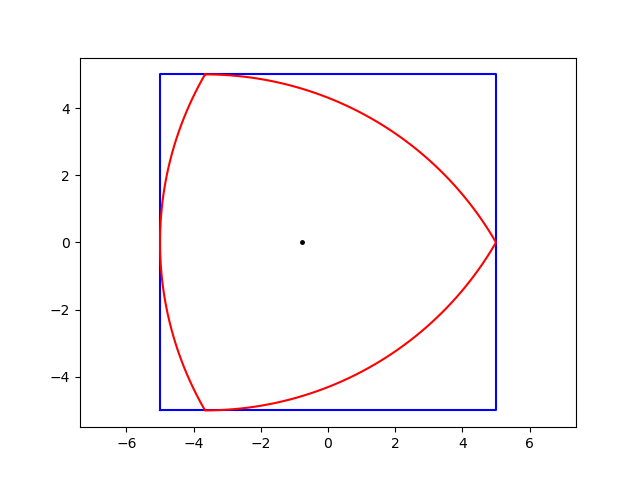

In [11]:
# обратите внимание на векторизацию вычислений с массивами без использования циклов
relo_matrix_shifted = relo_matrix - shift
center -= shift #сдвигаем центр на вектор shift

plt.figure()
plt.plot(square[:,0],square[:,1],'b-') #квадрат
plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-') #треугольник
plt.plot(center[0],center[1],'k.',markersize=5)#центр


plt.axis('equal')

## Этап 2. Анимация поступательного движения треугольника Рело по заданной траектории

Полагаем, что при качении треугольника Рело по квадрату центр треугольника Рело совершает поступательное движение по окружности с центром в начале координат и радиусом, равным shift[0], против часовой стрелки.

Зададим количество кадров анимации, необходимое для прохождения центром треугольника Рело полного оборота по окружности

In [12]:
N_frames = 100 #количество кадров анимации

Создадим матрицу center_frame из N_frames строк двух столбцов для описания координат точек окружности с центром в начале координат и радиусом shift[0] при обходе окружности против часовой стрелки от $-\pi$ до $\pi$. В первом столбце матрицы расположены $x$ -координаты точек, во втором столбце -- $y$ координаты.

In [13]:
# обратите внимание на векторизацию вычислений с массивами без использования циклов
t_center = np.linspace(-np.pi, np.pi, N_frames)
center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)]) # матрица из N_frames строк 2-х столбцов для описания координат точек окружности с центром в начале координат и радиусом shift[0]

In [14]:
center_frame[0]

array([-7.73502692e-01, -9.47267596e-17])

Изобразим первый кадр анимации. Для этого в одной графической области изображаем квадрат (сплошная линия синего цвета), вписанный треугольник Рело (сплошная линия красного цвета), центр треугольника Рело (линия по точкам красного цвета) и окружность, по которой будет двигаться центр треугольника Рело (пунктирная линия черного цвета).

(-5.5, 5.5, -5.5, 5.500000000000001)

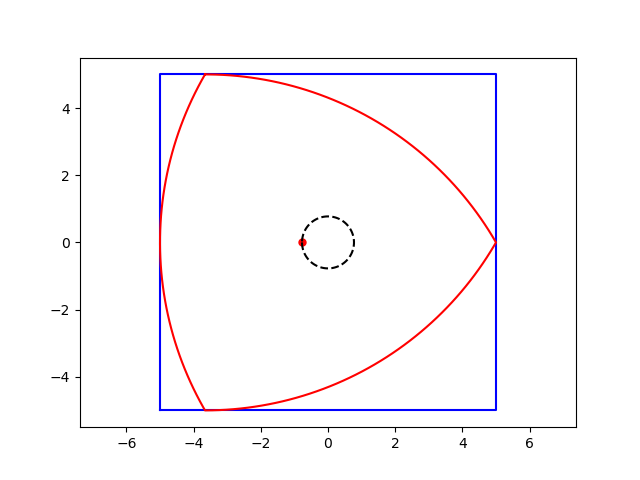

In [15]:
frame = 0

relo_matrix_shifted = relo_matrix + center_frame[frame]

plt.figure()
plt.plot(square[:,0],square[:,1],'b-') #квадрат
plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-') #треугольник Рело
plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10) #центр треугольника - точка
plt.plot(center_frame[:,0],center_frame[:,1],'k--') #окружность, по которой будет двигаться центр треугольника Рело

plt.axis('equal')

$\color{red}{Напишите}$ пользовательскую функцию трех аргументов draw_frame(r, N_frames, frame), которая изображает кадр с номером frame для анимации поступательного движения треугольника Рело. Переменные из глобальной области видимости в теле функции использовать нельзя!

* Аргумент r задает ширину треугольника Рело
* Аргумент N_frames задает количества кадров для прохождения центром треугольника Рело полной окружности
* Аргумент frame задает номер кадра. По умолчанию frame=0
* функция осуществляет визуализацию и не возвращает объекты

In [16]:
def draw_frame(r, N_frames, frame = 0):
    n = 3 # количество вершин треугольника Рело
    center = np.array([0.,0.]) # центр треугольника Рело
    N = 100 # количество точек для описания стороны треугольника Рело
    relo_matrix = relo.regular_polygon_Relo(r=r, center=center, N=N)
    s = [[center[0] - r/2, center[1] - r/2],[center[0] + r/2, center[1] - r/2],[center[0] + r/2,center[0] + r/2],[center[0] - r/2, center[1] + r/2],[center[0] - r/2, center[1] - r/2]]
    square = np.array(s)

    max_x_relo = relo_matrix[0][0]
    
    for i in range(len(relo_matrix)):
        if relo_matrix[i][0] > max_x_relo:
            max_x_relo = relo_matrix[i][0]
    
    max_x_sq = max(square[:,0])
    shift_x = max_x_relo - max_x_sq
    shift = np.array([shift_x, 0.]) # добавляем 0, т.к. по игрикам не сдвигаем
    
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])
    
    relo_matrix_shifted = relo_matrix + center_frame[frame]

    
    plt.plot(square[:,0],square[:,1],'b-')
    plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
    plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
    plt.plot(center_frame[:,0],center_frame[:,1],'k--')

    plt.axis('equal')
    
    return None  

Изобразим несколько кадров анимации, расположив их в одном графическом окне по горизонтали. Для этого используем функцию subplot(m,n,k) из модуля pyplot пакета matplotlib, которая позволяет расположить графики в виде таблицы из $m$ строк, $n$ столбцов на $k$-ой позиции при последовательной нумерации графиков слева-направо и сверху-вниз.

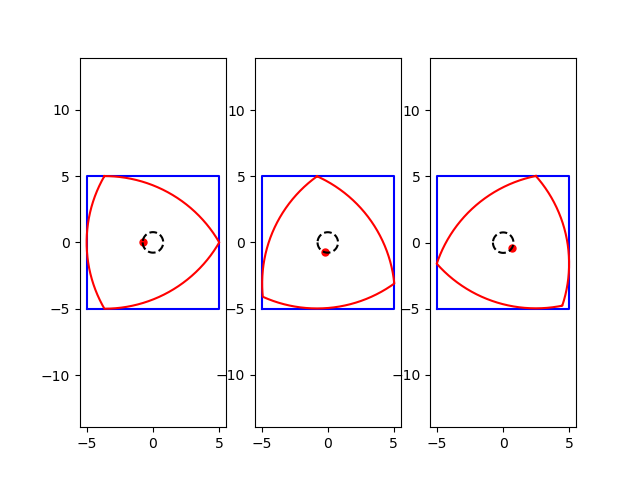

In [28]:
plt.figure()
r = 10
N_frames = 100

plt.subplot(1,3,1)
draw_frame(r=r, N_frames=N_frames)

plt.subplot(1,3,2)
draw_frame(r=r, N_frames=N_frames, frame=20)

plt.subplot(1,3,3)
draw_frame(r=r, N_frames=N_frames, frame=40)

In [18]:
from matplotlib.animation import FuncAnimation #для построения анимации используем ф-цию FuncAnimation 

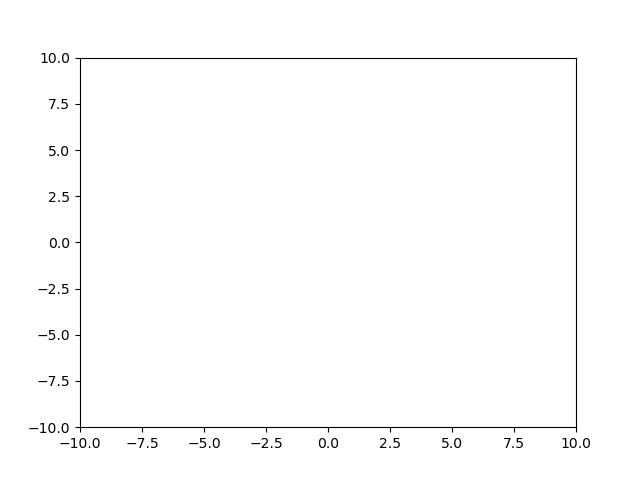

In [29]:
fig = plt.figure()
ax = plt.axes()
plt.axis([-r,r,-r,r])

def init():
    """cоздает начальное состояние графической области перед началом анимации и возвращает None"""
    global triangle, cen_fr, relo_matrix, N_frames # сделаны глобальными, чтобы были видна в функции at_frame3
    n = 3 # количество вершин треугольника Рело
    c = np.array([0.,0.]) # центр треугольника Рело
    r = 10 # ширина треугольника Рело
    N = 100 # количество точек для описания стороны треугольника Рело
    N_frames = 100
    relo_matrix = relo.regular_polygon_Relo(r=r, center=c, N=N)
    s = [[c[0] - r/2, c[1] - r/2],[c[0] + r/2, c[1] - r/2],[c[0] + r/2,c[0] + r/2],[c[0] - r/2, c[1] + r/2],[c[0] - r/2, c[1] - r/2]]
    square = np.array(s)
    
    max_x_relo = relo_matrix[0][0]   
    for i in range(len(relo_matrix)):
        if relo_matrix[i][0] > max_x_relo:
            max_x_relo = relo_matrix[i][0]    
    max_x_sq = max(square[:,0])
    shift_x = max_x_relo - max_x_sq
    shift = np.array([shift_x, 0.]) # добавляем 0, т.к. по игрикам не сдвигаем
    
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])
    relo_matrix_shifted = relo_matrix + center_frame[frame]
    
    sq, = plt.plot(square[:,0],square[:,1],'b-')
    triangle, = plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
    cen, = plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize = 10)
    cen_fr, = plt.plot(center_frame[:,0],center_frame[:,1],'k--')
    plt.axis('equal')
    return None

def draw_frame(frame):
    """ функция, которая будут вызываться в каждом кадре анимации"""
    relo_matrix_shifted = relo_matrix + center_frame[frame]
    triangle.set_data(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1])
    cen_fr.set_data(center_frame[:,0],center_frame[:,1])
            
    return None
    
FuncAnimation(fig, draw_frame, frames = N_frames, init_func=init, repeat = False, interval=100)  

## Этап 3. Анимация поступательного и вращательного движения треугольника Рело

Дополнительно к поступательному движению треугольника Рело добавим вращательное движение по часовой стрелке на угол $\theta$. При этом будем учитывать, что полный оборот центра треугольника на угол $2\pi$ соответствует вращению треугольника Рело на угол $2\pi/3$.

Определим пользовательскую функцию rotate_matrix(theta) для создания матрицы поворота по часовой стрелке на угол theta с применением синтаксиса lambda-функций

In [20]:
rotate_matrix = lambda theta: np.array([[np.cos(theta), np.sin(theta)],
                                        [-np.sin(theta), np.cos(theta)]]) #функция для создания матрицы поворота по часовой стрелке на угол theta
rotate_matrix(np.pi)

array([[-1.0000000e+00,  1.2246468e-16],
       [-1.2246468e-16, -1.0000000e+00]])

Для поворота треугольника Рело на заданный угол необходимо матрицу поворота умножить на каждую точку в представлении треугольника Рело с центром в начале координат relo_matrix. Для умножения матрицы на вектор используем функцию dot из расширения numpy

Например, повернем треугольник Рело relo_matrix на угол $\pi/3$ по часовой стрелке

In [21]:
theta = np.pi/3
matrix = rotate_matrix(theta) #матрица поворота по часовой стрелке на угол theta 
relo_matrix_rotated = np.array([np.dot(matrix,row) for row in relo_matrix]) #умножаем матрицу на вектор с помощью функции dot

Изобразим исходный треугольник Рело и повернутый треугольник Рело в одной графической области. При этом выделим маркером первую точку в матричном представлении треугольника Рело, чтобы проиллюстрировать эффект вращения по часовой стрелке

(-6.3508529610858835, 6.350852961085886, -5.500000000000005, 5.500000000000001)

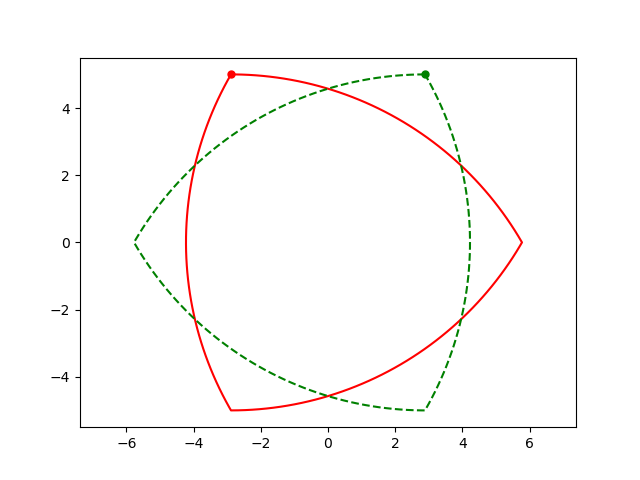

In [30]:
plt.figure()

plt.plot(relo_matrix[:,0],relo_matrix[:,1],'r-') #исходный треугольник
plt.plot(relo_matrix[0,0],relo_matrix[0,1],'r.',markersize=10) #первая точка 

plt.plot(relo_matrix_rotated[:,0],relo_matrix_rotated[:,1],'g--') #повернутый треугольник
plt.plot(relo_matrix_rotated[0,0],relo_matrix_rotated[0,1],'g.',markersize=10) #первая точка

plt.axis('equal')

Определим массив theta со значениями угла поворота при вращательном движении, согласованный с полным оборотом центра треугольника Рело

In [23]:
theta = np.linspace(0, 2*np.pi/3, N_frames) #массив углов поворота при рващательном движении, согласованный с полным оборотом центра треугольника Рело

Для совмещения вращательного и поступательного движения треугольника Рело в кадре frame сначала будем поворачивать треугольник Рело с центром в начале координат на угол theta[frame], затем будем перемещать треугольник Рело на вектор center_frame[frame]

Изобразим 20-ый кадр анимации качения треугольника Рело

(-5.501735269668723,
 5.536440663043177,
 -5.5002878716042405,
 5.5060453036890555)

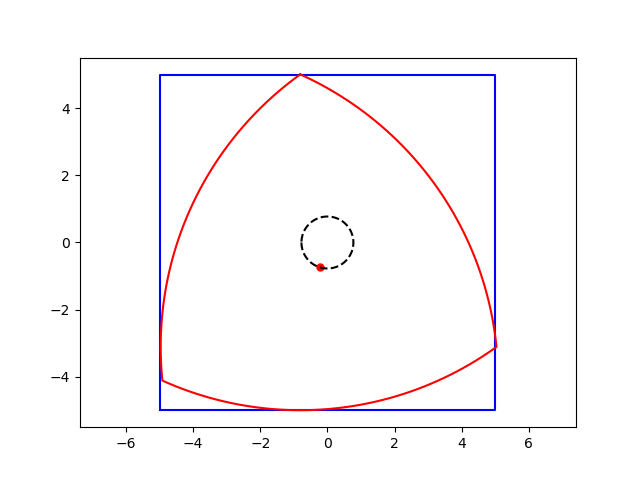

In [24]:
frame = 20

matrix = rotate_matrix(theta[frame])
relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix]) 
                       + center_frame[frame])

plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_changed[:,0],relo_matrix_changed[:,1],'r-')
plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
plt.plot(center_frame[:,0],center_frame[:,1],'k--')

plt.axis('equal')

In [25]:
def draw_frame(r, N_frames, frame = 0):
    n = 3 # количество вершин треугольника Рело
    center = np.array([0.,0.]) # центр треугольника Рело
    N = 100 # количество точек для описания стороны треугольника Рело
    relo_matrix = relo.regular_polygon_Relo(r=r, center=center, N=N)
    s = [[center[0] - r/2, center[1] - r/2],[center[0] + r/2, center[1] - r/2],[center[0] + r/2,center[0] + r/2],[center[0] - r/2, center[1] + r/2],[center[0] - r/2, center[1] - r/2]]
    square = np.array(s)

    max_x_relo = relo_matrix[0][0]
    
    for i in range(len(relo_matrix)):
        if relo_matrix[i][0] > max_x_relo:
            max_x_relo = relo_matrix[i][0]
    
    max_x_sq = max(square[:,0])
    shift_x = max_x_relo - max_x_sq
    shift = np.array([shift_x, 0.]) # добавляем 0, т.к. по игрикам не сдвигаем
    
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])
    
    rotate_matrix = lambda theta: np.array([[np.cos(theta), np.sin(theta)],
                                        [-np.sin(theta), np.cos(theta)]])
    theta = np.linspace(0, 2*np.pi/3, N_frames) #массив углов поворота при арвщательном движении, согласованный с полным оборотом центра треугольника Рело
    matrix = rotate_matrix(theta[frame])
    relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix]) 
                       + center_frame[frame])
    
    plt.plot(square[:,0],square[:,1],'b-')
    plt.plot(relo_matrix_changed[:,0],relo_matrix_changed[:,1],'r-')
    plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
    plt.plot(center_frame[:,0],center_frame[:,1],'k--')

    plt.axis('equal')
    
    return None

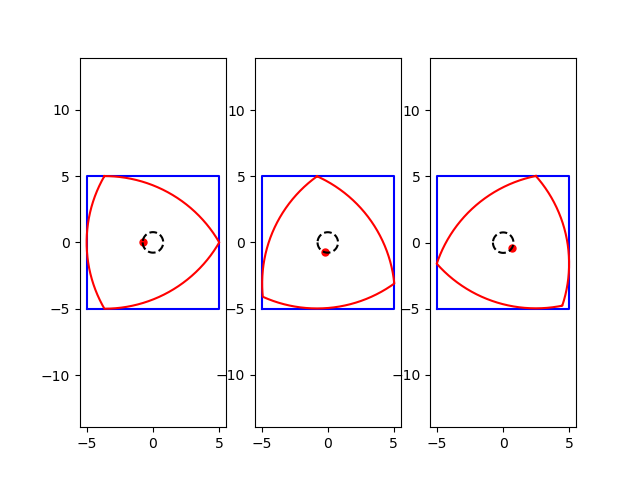

In [26]:
plt.figure()

plt.subplot(1,3,1)
draw_frame(r=r, N_frames=N_frames)

plt.subplot(1,3,2)
draw_frame(r=r, N_frames=N_frames, frame=20)

plt.subplot(1,3,3)
draw_frame(r=r, N_frames=N_frames, frame=40)

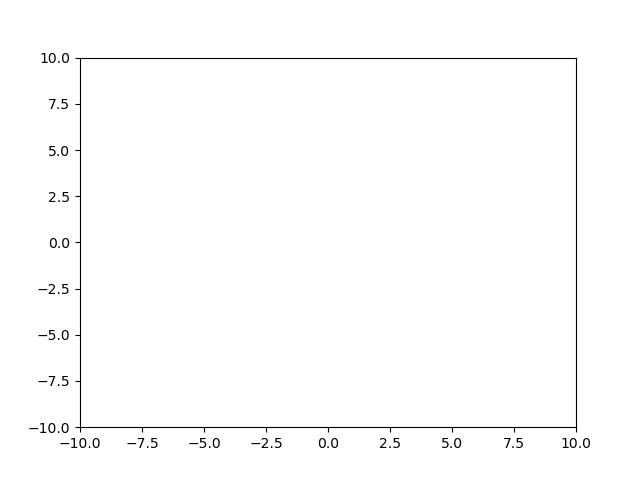

In [32]:
fig1 = plt.figure()
ax1 = plt.axes()
plt.axis([-r,r,-r,r])

def init1():
    """cоздает начальное состояние графической области перед началом анимации и возвращает None"""
    global triangle, cen_fr, relo_matrix, N_frames, cen # сделаны глобальными, чтобы были видна в функции at_frame3
    n = 3 # количество вершин треугольника Рело
    c = np.array([0.,0.]) # центр треугольника Рело
    r = 10 # ширина треугольника Рело
    N = 100 # количество точек для описания стороны треугольника Рело
    N_frames = 100 #количество кадров
    relo_matrix = relo.regular_polygon_Relo(r=r, center=c, N=N)
    s = [[c[0] - r/2, c[1] - r/2],[c[0] + r/2, c[1] - r/2],[c[0] + r/2,c[0] + r/2],[c[0] - r/2, c[1] + r/2],[c[0] - r/2, c[1] - r/2]]
    square = np.array(s)
    
    max_x_relo = relo_matrix[0][0]   
    for i in range(len(relo_matrix)):
        if relo_matrix[i][0] > max_x_relo:
            max_x_relo = relo_matrix[i][0]    
    max_x_sq = max(square[:,0])
    shift_x = max_x_relo - max_x_sq
    shift = np.array([shift_x, 0.]) # добавляем 0, т.к. по игрикам не сдвигаем
    
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])
    
    rotate_matrix = lambda theta: np.array([[np.cos(theta), np.sin(theta)],
                                        [-np.sin(theta), np.cos(theta)]])
    theta = np.linspace(0, 2*np.pi/3, N_frames) #массив углов поворота при арвщательном движении, согласованный с полным оборотом центра треугольника Рело
    matrix = rotate_matrix(theta[frame])
    relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix]) 
                       + center_frame[frame])
    
    sq, = plt.plot(square[:,0],square[:,1],'b-')
    triangle, = plt.plot(relo_matrix_changed[:,0],relo_matrix_changed[:,1],'r-')
    cen, = plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize = 10)
    cen_fr, = plt.plot(center_frame[:,0],center_frame[:,1],'k--')
    plt.axis('equal')
    return None

def draw_frame1(frame):
    """функция, которая будет вызываться в каждом кадре анимации"""
    matrix = rotate_matrix(theta[frame])
    relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix]) 
                       + center_frame[frame])
    triangle.set_data(relo_matrix_changed[:,0],relo_matrix_changed[:,1])
    cen_fr.set_data(center_frame[:,0],center_frame[:,1])
    cen.set_data(center_frame[frame,0],center_frame[frame,1])
            
    return None
    
FuncAnimation(fig1, draw_frame1, frames = N_frames, init_func=init1, repeat = False, interval=100) 